### Подключение библиотек и загрузка датасета

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
diabetes_df = pd.read_csv('diabetes_clean.csv')
print(diabetes_df.head(10))
print(diabetes_df.shape)

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   
5            5      116         74        0        0  25.6  0.201   30   
6            3       78         50       32       88  31.0  0.248   26   
7           10      115          0        0        0  35.3  0.134   29   
8            2      197         70       45      543  30.5  0.158   53   
9            8      125         96        0        0   0.0  0.232   54   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
5         0  
6         1  
7         0  
8         1  
9         1  
(768, 9)


### Исключение аномальных значений

In [4]:
diabetes_df = diabetes_df[diabetes_df['bmi'] > 0]
diabetes_df = diabetes_df[diabetes_df['glucose'] > 0]
diabetes_df = diabetes_df[diabetes_df['diastolic'] > 0]
diabetes_df = diabetes_df[diabetes_df['triceps'] > 0]
diabetes_df = diabetes_df[diabetes_df['insulin'] > 0]
print(diabetes_df.shape)

(392, 9)


### Разбивка данных на целевую переменную и массив признаков

In [5]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose']

### Предсказание по одной перменной (BMI)

In [6]:
X_bmi = X[:, 4]
print(y.shape, X_bmi.shape)
print(X_bmi)

(392,) (392,)
[28.1 43.1 31.  30.5 30.1 25.8 45.8 43.3 34.6 39.3 36.6 31.1 23.2 22.2
 31.6 24.8 24.  37.1 34.  45.4 19.4 24.2 24.4 33.7 34.7 37.7 46.8 41.5
 25.4 19.6 28.9 32.9 28.6 35.1 29.3 32.4 38.5 37.1 32.  46.7 24.7 33.9
 20.4 28.7 49.7 26.6 28.7 29.5 34.3 37.4 33.3 34.  31.2 30.5 23.2 53.2
 33.6 55.  42.9 33.3 34.5 29.7 34.5 21.1 33.8 30.8 28.7 36.9 32.5 32.8
 30.5 37.4 34.3 40.6 24.6 25.2 29.  40.9 37.2 44.2 29.9 28.4 35.4 43.5
 29.7 32.7 67.1 34.9 30.1 32.  27.9 31.6 33.1 39.4 22.9 34.8 30.9 20.4
 37.7 37.5 33.2 42.6 34.2 41.8 35.8 30.  34.6 28.8 23.6 34.6 36.7 45.2
 46.2 25.4 29.7 35.9 33.1 27.1 38.2 52.3 35.4 24.4 27.6 25.9 33.3 30.9
 33.6 25.2 33.2 40.5 27.8 25.3 35.9 32.4 26.  38.7 45.6 20.8 36.1 36.9
 36.6 43.3 40.5 35.5 28.  30.7 36.6 31.6 35.8 39.7 25.5 24.8 30.5 32.9
 39.4 26.6 29.5 34.1 19.3 38.1 27.5 26.8 25.6 35.1 45.5 30.8 32.7 23.9
 47.9 34.2 25.9 25.9 38.5 28.7 21.8 27.2 33.3 35.3 36.5 31.2 34.9 34.
 27.5 32.8 38.4 35.8 34.9 36.2 39.2 25.2 37.2 43.4 30.8 25.4 25.

In [7]:
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)
print(X_bmi)

(392, 1)
[[28.1]
 [43.1]
 [31. ]
 [30.5]
 [30.1]
 [25.8]
 [45.8]
 [43.3]
 [34.6]
 [39.3]
 [36.6]
 [31.1]
 [23.2]
 [22.2]
 [31.6]
 [24.8]
 [24. ]
 [37.1]
 [34. ]
 [45.4]
 [19.4]
 [24.2]
 [24.4]
 [33.7]
 [34.7]
 [37.7]
 [46.8]
 [41.5]
 [25.4]
 [19.6]
 [28.9]
 [32.9]
 [28.6]
 [35.1]
 [29.3]
 [32.4]
 [38.5]
 [37.1]
 [32. ]
 [46.7]
 [24.7]
 [33.9]
 [20.4]
 [28.7]
 [49.7]
 [26.6]
 [28.7]
 [29.5]
 [34.3]
 [37.4]
 [33.3]
 [34. ]
 [31.2]
 [30.5]
 [23.2]
 [53.2]
 [33.6]
 [55. ]
 [42.9]
 [33.3]
 [34.5]
 [29.7]
 [34.5]
 [21.1]
 [33.8]
 [30.8]
 [28.7]
 [36.9]
 [32.5]
 [32.8]
 [30.5]
 [37.4]
 [34.3]
 [40.6]
 [24.6]
 [25.2]
 [29. ]
 [40.9]
 [37.2]
 [44.2]
 [29.9]
 [28.4]
 [35.4]
 [43.5]
 [29.7]
 [32.7]
 [67.1]
 [34.9]
 [30.1]
 [32. ]
 [27.9]
 [31.6]
 [33.1]
 [39.4]
 [22.9]
 [34.8]
 [30.9]
 [20.4]
 [37.7]
 [37.5]
 [33.2]
 [42.6]
 [34.2]
 [41.8]
 [35.8]
 [30. ]
 [34.6]
 [28.8]
 [23.6]
 [34.6]
 [36.7]
 [45.2]
 [46.2]
 [25.4]
 [29.7]
 [35.9]
 [33.1]
 [27.1]
 [38.2]
 [52.3]
 [35.4]
 [24.4]
 [27.6]
 [25.9]

### Просмотр данных (глюкоза/BMI)

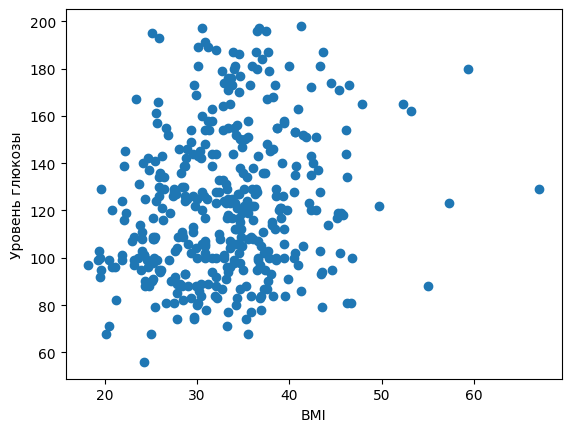

In [8]:
plt.scatter(X_bmi, y)
plt.ylabel('Уровень глюкозы')
plt.xlabel('BMI')
plt.show()

### Создание модели

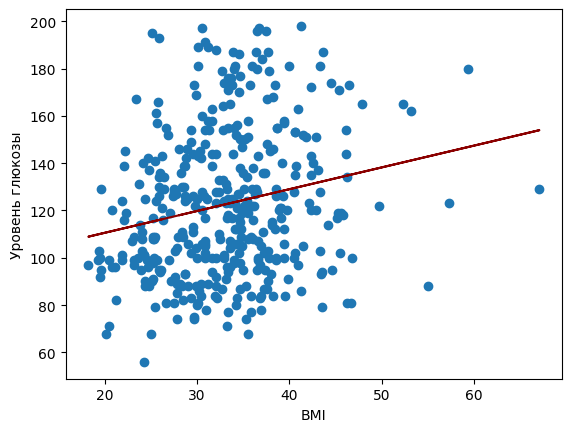

In [9]:
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color = 'darkred')
plt.ylabel('Уровень глюкозы')
plt.xlabel('BMI')
plt.show()

In [10]:
reg.score(X_bmi, y)

0.04389692023833025

### Линейная регрессия для множества признаков

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [12]:
X_train.shape

(274, 8)

In [13]:
reg_all.coef_

array([-1.28500829e-02,  2.19301043e-01,  1.69189425e-01,  1.15959161e-01,
       -2.17617366e-01, -7.32043269e-01,  3.88318495e-01,  2.18012992e+01])

In [14]:
reg_all.intercept_

np.float64(73.36744043218323)

### Оценка R-квадрат

In [15]:
reg_all.score(X_test, y_test)

0.4299960034329907

### Кросвалидация

In [16]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 12, shuffle=True, random_state=16)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv = kf)

In [17]:
print(cv_results)

[0.35662647 0.4223451  0.46102737 0.49630012 0.60779903 0.37507133
 0.38933465 0.09035752 0.09662905 0.46044899 0.65870637 0.60577687]


### Гребневая регрессия

In [23]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0, 0.01, 0.1, 1, 10, 100, 1000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)


[0.42999600343299094, 0.42999772729018737, 0.4300127945118456, 0.43012128563285446, 0.4284769509300663, 0.3956135915680241, 0.36187662648929064]


In [34]:
scores = []
for alpha in [0.01, 0.1, 1, 10, 20, 50]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict (X_test) 
    scores.append(ridge.score(X_test, y_test))

print (scores)
print(y_pred)

[0.42999772729018737, 0.4300127945118456, 0.43012128563285446, 0.4284769509300663, 0.4241942383598576, 0.4107350477359496]
[146.34603185 142.8332495  105.92880757 138.00226588 122.3886752
 162.1698478  110.13327853 112.85247479 135.7737914  101.92405785
 121.38511735 114.67838146 110.44939567 115.88412083 114.57554977
 102.93220989 137.28104372 129.99696754 105.67034364 113.3879514
 101.14050943  97.62893057 136.07999819 187.67672086 139.06025425
 127.53101081 104.98325003 141.05751124 107.58516657 180.58811983
 123.55793358 107.49040611 117.07569847 153.67681705 106.59007381
 143.32005198 129.31721724 130.79512838 157.74828968 106.99933956
 196.76650832 102.23303875 112.95711798 114.55120881  98.24680987
 141.66120875 117.58776886 136.31825799  84.90716471 106.58797953
 153.09485781 114.83791606 101.45655902 126.30296049 149.39778344
 105.17263746 108.34432771 123.36805529 133.32414141 128.43933719
 126.11019077 122.08689411 117.24093099 134.16516522 102.49293146
 125.22746363 108.075

### Лассо регрессия

In [26]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 0.1, 1, 10, 20, 50]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.43008919275821944, 0.43063704842301465, 0.42793273876133375, 0.36329181306677527, 0.3701400001726066, 0.3760492961224219]


### Выбор признаков с помощью Лассо регрессии

In [27]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

In [28]:
print(lasso_coef)

[-0.          0.22203199  0.16383594  0.1160724  -0.20357241 -0.
  0.39295306 21.09495878]


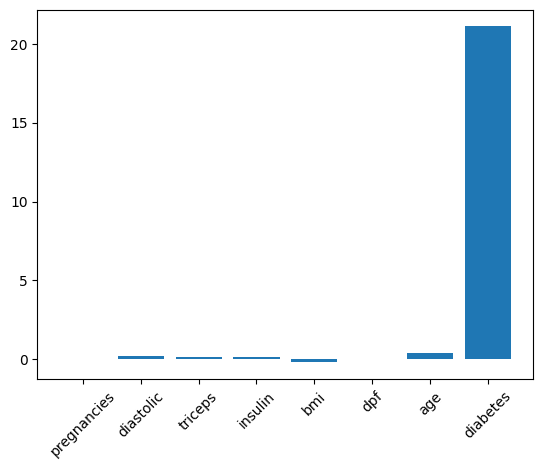

In [31]:
names = diabetes_df.drop('glucose', axis=1).columns
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()